In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

100%|██████████| 5.32M/5.32M [00:00<00:00, 35.1MB/s]

Extracting files...


Path to dataset files: /Users/kush/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3


In [1]:
path = '/Users/kush/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
dataset_path = path + '/application_record.csv'
dataset_path_credit = path + '/credit_record.csv'
dataset_application = pd.read_csv(dataset_path)
dataset_credit = pd.read_csv(dataset_path_credit)

In [4]:
dataset_application.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
dataset_credit.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
print("\n🔍 Missing Values in Application Dataset:")
print(dataset_application.isnull().sum())


🔍 Missing Values in Application Dataset:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [7]:
print("\n🔍 Missing Values in Credit Dataset:")
print(dataset_credit.isnull().sum())


🔍 Missing Values in Credit Dataset:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [8]:
dataset_application.dropna(subset=["OCCUPATION_TYPE"], inplace=True)

In [9]:
dataset_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [10]:
dataset_credit["Default"] = dataset_credit["STATUS"].apply(lambda x: 1 if str(x).isdigit() and int(x) >= 2 else 0)


In [11]:
credit_default_status = dataset_credit.groupby("ID")["Default"].max().reset_index()


In [12]:
data_merged = dataset_application.merge(credit_default_status, on="ID", how="left")
data_merged["Default"].fillna(0, inplace=True)  


/var/folders/94/hh1vsyq97qqb4fng65yxgh0c0000gn/T/ipykernel_6639/171965894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_merged["Default"].fillna(0, inplace=True)


In [13]:
categorical_columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                       "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", 
                       "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]

In [ ]:
encoder = LabelEncoder()
for col in categorical_columns:
    data_merged[col] = encoder.fit_transform(data_merged[col])

In [15]:
data_merged["AGE_YEARS"] = abs(data_merged["DAYS_BIRTH"]) // 365
data_merged["YEARS_EMPLOYED"] = abs(data_merged["DAYS_EMPLOYED"]) // 365
data_merged.drop(["DAYS_BIRTH", "DAYS_EMPLOYED"], axis=1, inplace=True)

In [16]:
data_merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Default,AGE_YEARS,YEARS_EMPLOYED
0,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,0.0,58,3
1,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,0.0,52,8
2,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,0.0,52,8
3,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,0.0,52,8
4,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,0.0,52,8


In [17]:
scaler = StandardScaler()
numerical_columns = ["AMT_INCOME_TOTAL", "CNT_CHILDREN", "CNT_FAM_MEMBERS", "AGE_YEARS", "YEARS_EMPLOYED"]
data_merged[numerical_columns] = scaler.fit_transform(data_merged[numerical_columns])


In [18]:
print("\n✅ Final Processed Data Sample:")
print(data_merged.head())


✅ Final Processed Data Sample:
        ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806            1             1                1     -0.667509   
1  5008808            0             0                1     -0.667509   
2  5008809            0             0                1     -0.667509   
3  5008810            0             0                1     -0.667509   
4  5008811            0             0                1     -0.667509   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         -0.704169                 4                    4   
1          0.642308                 0                    4   
2          0.642308                 0                    4   
3          0.642308                 0                    4   
4          0.642308                 0                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0                   1                  1           1                0   
1               

In [19]:
data_merged.to_csv("processed_credit_data.csv", index=False)
print("\n Processed dataset saved as 'processed_credit_data.csv'.")


 Processed dataset saved as 'processed_credit_data.csv'.


In [19]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


In [4]:
data = pd.read_csv("processed_credit_data.csv")

In [ ]:
X = data.drop(columns=["ID", "Default"])  
y = data["Default"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Try 1, simple XGBoost

In [28]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    eval_metric="logloss", 
    use_label_encoder=False
)

In [8]:
xgb_model.fit(X_train, y_train)

/Users/kush/Documents/Projects/Credit Risk Management/crediter/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [11:52:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
print("\n✅ Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

Analysis: the data is not distributed well, this shows how the model is not able to learn well and outputs pretty much equivalent to guessing

## Try 2: Attempt to balance the Dataset

In [23]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy=0.4)  # Adjusting ratio of 1s to 0s
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


In [24]:
from collections import Counter

print("🔍 Class Distribution Before Resampling:")
print(Counter(y_train))

print("\n✅ Class Distribution After Resampling:")
print(Counter(y_train_resampled))

🔍 Class Distribution Before Resampling:
Counter({0.0: 243145, 1.0: 338})

✅ Class Distribution After Resampling:
Counter({0.0: 242047, 1.0: 83979})


In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,  
    max_depth=5,        
    learning_rate=0.05,  
    subsample=0.8,      
    colsample_bytree=0.8,  
    reg_alpha=0.1,  
    reg_lambda=0.1,  
    scale_pos_weight=1,  # Keep balanced if using SMOTEENN
    eval_metric="auc"
)

xgb_model.fit(X_train_resampled, y_train_resampled)


/Users/kush/Documents/Projects/Credit Risk Management/crediter/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [12:07:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred = xgb_model.predict(X_test)

In [31]:
print("\n✅ Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


✅ Model Performance:
Accuracy: 0.9962
Precision: 0.0373
Recall: 0.0714
F1 Score: 0.0490
AUC Score: 0.5344


In [34]:
print(xgb_model.get_params())


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


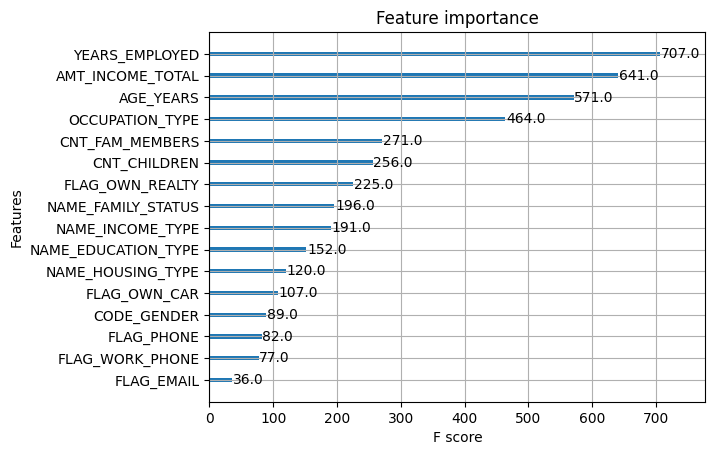

In [35]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()

Analysis: Model did a bit better but still is as good as guessing, model doesnt learn

## Try 3: Work on improving the model Hyper parameters

In [37]:
print("🔍 Class Distribution Before Resampling:")
print(Counter(y_train))

🔍 Class Distribution Before Resampling:
Counter({0.0: 243145, 1.0: 338})


In [38]:
smote_enn = SMOTEENN(sampling_strategy=0.4)  # Adjusting ratio of 1s to 0s
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

In [39]:
print("\n✅ Class Distribution After Resampling:")
print(Counter(y_train_resampled))


✅ Class Distribution After Resampling:
Counter({0.0: 242051, 1.0: 84201})


In [40]:
print("\n🔍 XGBoost Default Hyperparameters:")
xgb_default = xgb.XGBClassifier()
print(xgb_default.get_params())


🔍 XGBoost Default Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [41]:
param_grid = {
    'n_estimators': [200, 300, 500],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0],  
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [0, 0.1, 0.5],  
    'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]  # Auto-balancing classes
}


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric="auc"),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,  # 3-Fold Cross Validation
    n_jobs=-1,  # Use all available cores
    verbose=2
)

In [45]:
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print(f"\n✅ Best Hyperparameters: {best_params}")

Fitting 3 folds for each of 4374 candidates, totalling 13122 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1.0; total time=   2.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_

/Users/kush/Documents/Projects/Credit Risk Management/crediter/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0, scale_pos_weight=719.3639053254437, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.7; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.7; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.8; tot

KeyboardInterrupt: 

Analysis: So after 4300 runs and 40 mins I realised the total runs for this process is 13000, this is very impractical. let us try something else now

In [ ]:
xgb_model = xgb.XGBClassifier(
    **best_params,
    eval_metric="auc"
)

In [ ]:
xgb_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
threshold = 0.4  # Try lowering from 0.5 if recall is too low
y_pred = (y_pred_prob >= threshold).astype(int)

In [ ]:
print("\n✅ Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

## Try 4: Try Randomized search

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0],  
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [0, 0.1, 0.5],  
    'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]
}

In [48]:
random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(eval_metric="auc"),
    param_distributions=param_dist,
    n_iter=50,  # Number of random samples to test (adjustable for speed)
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [49]:
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.7; total time=   3.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1, subsample=0.7; total time=   3.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, reg_alpha=0.5, reg_la

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'scale_pos_weight': [1,
                                                             719.3639053254437],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [50]:
best_params = random_search.best_params_
print(f"\n✅ Best Hyperparameters (RandomizedSearchCV): {best_params}")


✅ Best Hyperparameters (RandomizedSearchCV): {'subsample': 0.7, 'scale_pos_weight': 719.3639053254437, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [51]:
xgb_model = xgb.XGBClassifier(
    **best_params,
    eval_metric="auc"
)

In [52]:
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.4  # Try lowering from 0.5 if recall is too low
y_pred = (y_pred_prob >= threshold).astype(int)
print("\n✅ Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


✅ Model Performance:
Accuracy: 0.9842
Precision: 0.0270
Recall: 0.2976
F1 Score: 0.0496
AUC Score: 0.6414


Analysis: Still a bad score, why dont we revisit the data

## Try 4: Reconsidering everything

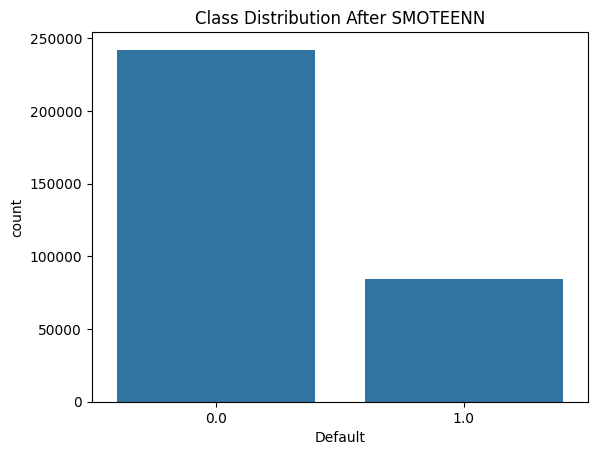

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTEENN")
plt.show()

In [54]:

correlation_matrix = X_train_resampled.corr().abs()

high_correlation = np.where(correlation_matrix > 0.9)
high_correlation = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                    for x, y in zip(*high_correlation) if x != y and x < y]

print("🔍 Highly Correlated Features:", high_correlation)

🔍 Highly Correlated Features: []


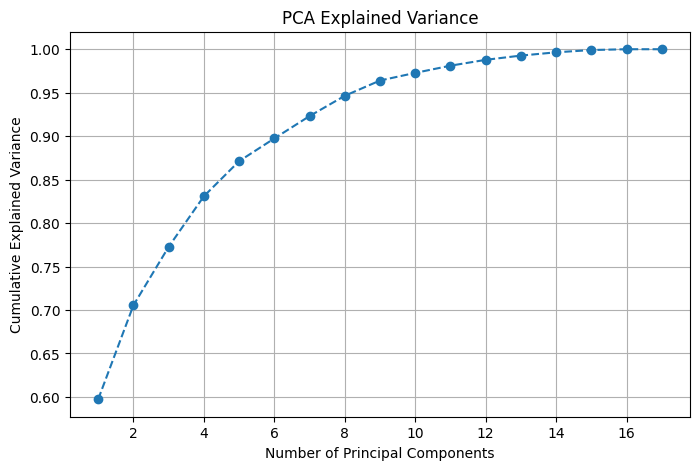

In [55]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train_resampled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance to choose the number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


In [61]:
pca = PCA(n_components=17)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [62]:
import optuna
from sklearn.feature_selection import SelectKBest, f_classif

def objective(trial):
    k = trial.suggest_int('k', 5, X_train_pca.shape[1])  # Number of top features to keep
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_pca, y_train_resampled)
    X_test_selected = selector.transform(X_test_pca)

    model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, eval_metric="auc")
    model.fit(X_train_selected, y_train_resampled)
    
    preds = model.predict_proba(X_test_selected)[:, 1]
    auc = roc_auc_score(y_test, preds)
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_k = study.best_params['k']
print(f"\n✅ Best Number of Features: {best_k}")

# Apply best feature selection
selector = SelectKBest(score_func=f_classif, k=best_k)
X_train_final = selector.fit_transform(X_train_pca, y_train_resampled)
X_test_final = selector.transform(X_test_pca)


[I 2025-03-12 14:04:40,012] A new study created in memory with name: no-name-71c10e9d-1347-4468-8d46-8087288e910d
[I 2025-03-12 14:04:41,640] Trial 0 finished with value: 0.6634071390577716 and parameters: {'k': 11}. Best is trial 0 with value: 0.6634071390577716.
[I 2025-03-12 14:04:43,141] Trial 1 finished with value: 0.6445290620566584 and parameters: {'k': 9}. Best is trial 0 with value: 0.6634071390577716.
[I 2025-03-12 14:04:44,906] Trial 2 finished with value: 0.662373475061632 and parameters: {'k': 17}. Best is trial 0 with value: 0.6634071390577716.
[I 2025-03-12 14:04:46,621] Trial 3 finished with value: 0.6654673187484479 and parameters: {'k': 14}. Best is trial 3 with value: 0.6654673187484479.
[I 2025-03-12 14:04:48,206] Trial 4 finished with value: 0.6634071390577716 and parameters: {'k': 11}. Best is trial 3 with value: 0.6654673187484479.
[I 2025-03-12 14:04:49,777] Trial 5 finished with value: 0.663359842760866 and parameters: {'k': 10}. Best is trial 3 with value: 0.6


✅ Best Number of Features: 12


In [64]:
xgb_model_pca = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    eval_metric="auc"
)

xgb_model_pca.fit(X_train_final, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:

y_pred_prob = xgb_model.predict_proba(X_test_final)[:, 1]
y_pred = (y_pred_prob >= 0.4).astype(int)

print("\n✅ Model Performance After PCA + Feature Selection:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred):.4f}")



✅ Model Performance After PCA + Feature Selection:
Accuracy: 0.9669
Precision: 0.0131
Recall: 0.3095
F1 Score: 0.0252
AUC Score: 0.6387


Analysis: This shows how useless advice from ChatGPT can be, now lets use our Brain and do it on our own

In [178]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [179]:
path = '/Users/kush/.cache/kagglehub/datasets/rikdifos/credit-card-approval-prediction/versions/3'

In [180]:
dataset_path = path + '/application_record.csv'
dataset_path_credit = path + '/credit_record.csv'
dataset_application = pd.read_csv(dataset_path)
dataset_credit = pd.read_csv(dataset_path_credit)

In [181]:
print("\n🔍 Missing Values in Application Dataset:")
print(dataset_application.isnull().sum())


🔍 Missing Values in Application Dataset:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [182]:
print("\n🔍 Missing Values in Credit Dataset:")
print(dataset_credit.isnull().sum())


🔍 Missing Values in Credit Dataset:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [183]:
df = dataset_application.merge(dataset_credit, how='inner', on=['ID'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [185]:
numCol  = [col for col in df.columns if  df[col].dtype != "O"]

In [186]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,1.885348e+05,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
DAYS_BIRTH,777715.0,-1.612494e+04,4104.304018,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
DAYS_EMPLOYED,777715.0,5.777583e+04,136471.735391,-15713.0,-3292.0,-1682.0,-431.0,365243.0
FLAG_MOBIL,777715.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,777715.0,2.318176e-01,0.421993,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,3.009650e-01,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,9.167497e-02,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837e+00,0.907380,1.0,2.0,2.0,3.0,20.0


In [187]:
df.shape

(777715, 20)

In [188]:
df['OCCUPATION_TYPE'] =df['OCCUPATION_TYPE'].replace(np.nan,'others')

In [189]:
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

/var/folders/94/hh1vsyq97qqb4fng65yxgh0c0000gn/T/ipykernel_8261/684538199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)


In [190]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,others,2.0,0,6
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,others,2.0,-1,6
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,others,2.0,-2,6
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,others,2.0,-3,6
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,others,2.0,-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [191]:
df["AGE_YEARS"] = abs(df["DAYS_BIRTH"]) // 365
df["YEARS_EMPLOYED"] = abs(df["DAYS_EMPLOYED"]) // 365
df.drop(["DAYS_BIRTH", "DAYS_EMPLOYED"], axis=1, inplace=True)

In [192]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2.0,0,6,32,12
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2.0,-1,6,32,12
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2.0,-2,6,32,12
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2.0,-3,6,32,12
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2.0,-4,6,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-9,0,25,3
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-10,2,25,3
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-11,1,25,3
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-12,0,25,3


In [193]:
categorical_columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                       "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", 
                       "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]
df[categorical_columns] = df[categorical_columns].astype(str) 
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [162]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE_YEARS,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,18,2.0,0,6,32,12
1,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,18,2.0,-1,6,32,12
2,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,18,2.0,-2,6,32,12
3,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,18,2.0,-3,6,32,12
4,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,18,2.0,-4,6,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,4,4,3,4,1,0,0,0,8,1.0,-9,0,25,3
777711,5150337,1,0,1,0,112500.0,4,4,3,4,1,0,0,0,8,1.0,-10,2,25,3
777712,5150337,1,0,1,0,112500.0,4,4,3,4,1,0,0,0,8,1.0,-11,1,25,3
777713,5150337,1,0,1,0,112500.0,4,4,3,4,1,0,0,0,8,1.0,-12,0,25,3


In [194]:
df = df.drop(['ID','MONTHS_BALANCE','FLAG_WORK_PHONE'],axis=1)

In [195]:
df["TARGET"] = df["STATUS"].apply(lambda x: "YES" if x in (2, 3, 4, 5) else "NO")

# Display the first few rows to verify
print(df[["STATUS", "TARGET"]].head())

   STATUS TARGET
0       6     NO
1       6     NO
2       6     NO
3       6     NO
4       6     NO


In [196]:
df['TARGET'].value_counts()

TARGET
NO     774887
YES      2828
Name: count, dtype: int64

In [197]:
df = pd.get_dummies(df, drop_first=True, columns=['OCCUPATION_TYPE'])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,OCCUPATION_TYPE_9,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17,OCCUPATION_TYPE_18
0,1,1,1,0,427500.0,4,1,0,4,1,...,False,False,False,False,False,False,False,False,False,True
1,1,1,1,0,427500.0,4,1,0,4,1,...,False,False,False,False,False,False,False,False,False,True
2,1,1,1,0,427500.0,4,1,0,4,1,...,False,False,False,False,False,False,False,False,False,True
3,1,1,1,0,427500.0,4,1,0,4,1,...,False,False,False,False,False,False,False,False,False,True
4,1,1,1,0,427500.0,4,1,0,4,1,...,False,False,False,False,False,False,False,False,False,True


In [198]:
x = df.drop(['TARGET'], axis=True)
y = df['TARGET']

In [199]:
sc=StandardScaler()
x_scaled = sc.fit_transform(x)

In [200]:
pca = PCA()
pct = pca.fit_transform(x_scaled)
print(np.round(pca.explained_variance_ratio_,decimals=3))
print('3 components explaining: ',sum(pca.explained_variance_ratio_[:3]))
print('4 components explaining: ',sum(pca.explained_variance_ratio_[:4]))
print('5 components explaining: ',sum(pca.explained_variance_ratio_[:5]))
print('6 components explaining: ',sum(pca.explained_variance_ratio_[:6]))
print('7 components explaining: ',sum(pca.explained_variance_ratio_[:7]))
print('8 components explaining: ',sum(pca.explained_variance_ratio_[:8]))
print('9 components explaining: ',sum(pca.explained_variance_ratio_[:9]))
print('10 components explaining: ',sum(pca.explained_variance_ratio_[:10]))
print('11 components explaining: ',sum(pca.explained_variance_ratio_[:11]))
print('12 components explaining: ',sum(pca.explained_variance_ratio_[:12]))
print('13 components explaining: ',sum(pca.explained_variance_ratio_[:13]))
print('14 components explaining: ',sum(pca.explained_variance_ratio_[:14]))
print('15 components explaining: ',sum(pca.explained_variance_ratio_[:15]))
print('16 components explaining: ',sum(pca.explained_variance_ratio_[:16]))
print('17 components explaining: ',sum(pca.explained_variance_ratio_[:17]))
print('18 components explaining: ',sum(pca.explained_variance_ratio_[:18]))
print('19 components explaining: ',sum(pca.explained_variance_ratio_[:19]))
print('20 components explaining: ',sum(pca.explained_variance_ratio_[:20]))
print('21 components explaining: ',sum(pca.explained_variance_ratio_[:21]))
print('22 components explaining: ',sum(pca.explained_variance_ratio_[:22]))
print('23 components explaining: ',sum(pca.explained_variance_ratio_[:23]))
print('24 components explaining: ',sum(pca.explained_variance_ratio_[:24]))
print('25 components explaining: ',sum(pca.explained_variance_ratio_[:25]))
print('26 components explaining: ',sum(pca.explained_variance_ratio_[:26]))
print('27 components explaining: ',sum(pca.explained_variance_ratio_[:27]))
print('28 components explaining: ',sum(pca.explained_variance_ratio_[:28]))
print('29 components explaining: ',sum(pca.explained_variance_ratio_[:29]))
print('30 components explaining: ',sum(pca.explained_variance_ratio_[:30]))

[0.099 0.053 0.052 0.049 0.037 0.035 0.034 0.033 0.032 0.032 0.031 0.031
 0.031 0.031 0.031 0.031 0.03  0.03  0.03  0.03  0.03  0.029 0.026 0.024
 0.024 0.023 0.022 0.02  0.016 0.014 0.008 0.001 0.001 0.   ]
3 components explaining:  0.20454937524562233
4 components explaining:  0.2530652395953095
5 components explaining:  0.29040415890771104
6 components explaining:  0.3249926882090397
7 components explaining:  0.35873657578173146
8 components explaining:  0.39167438957244904
9 components explaining:  0.4241633184928083
10 components explaining:  0.4559007450839266
11 components explaining:  0.4873692585970836
12 components explaining:  0.518570539402207
13 components explaining:  0.549705057824947
14 components explaining:  0.5804643170587502
15 components explaining:  0.6111971204669394
16 components explaining:  0.6417836034959493
17 components explaining:  0.6722395630545636
18 components explaining:  0.7026435062701112
19 components explaining:  0.7329639921511469
20 components e

(0, 2828, 50.0)
Class=0, n=2828 (50.000%)
(1, 2828, 50.0)
Class=1, n=2828 (50.000%)


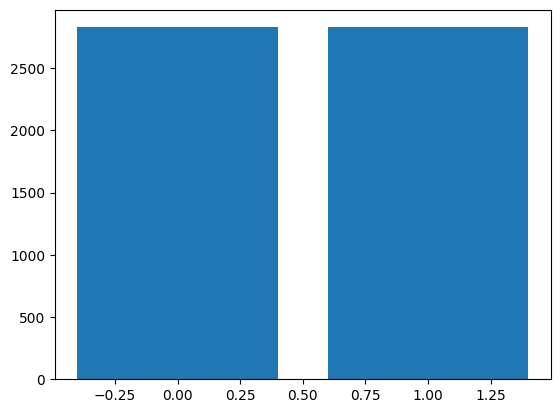

In [203]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
undersample = RandomUnderSampler(random_state=0)
y_numeric = y.map({"YES": 1, "NO": 0})  
X, y = undersample.fit_resample(x_scaled, y_numeric)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print((k,v,per))
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [204]:
x_train ,x_test ,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42,shuffle=True)

In [208]:
import xgboost as xgb
from sklearn.model_selection import KFold

In [211]:
def xgboost_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define matrix for xfb
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dvalid = xgb.DMatrix(x_test, label=y_test)
    #define parameters
    params = {
    'objective'        : 'reg:squarederror',
    'min_child_weight' : trial.suggest_int('min_child_weight', 1, 100),
    'lambda'           : trial.suggest_loguniform('lambda', 1e-3, 5.0),
    'alpha'            : trial.suggest_loguniform('alpha', 1e-3, 5.0),
    'max_depth'        : trial.suggest_categorical('max_depth', [3,4,5,6,7]),
    'subsample'        : trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
    'learning_rate'    : trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
    'n_estimators'     : trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]), 
    'colsample_bytree' : trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
    }
   
    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    for idx in list(kf.split(x_train,y_train)):
        #creat model anf pass parameters 
        model = xgb.XGBClassifier(**params, early_stopping_rounds=100) 
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False) 
        predection = model.predict(x_test)
        acc = accuracy_score(y_test, predection)
    return acc

In [212]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(xgboost_optuna, n_trials=200)

[I 2025-03-12 16:21:52,653] A new study created in memory with name: no-name-54f0ce39-c82d-4999-8520-88dc636e3835
/var/folders/94/hh1vsyq97qqb4fng65yxgh0c0000gn/T/ipykernel_8261/972091064.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda'           : trial.suggest_loguniform('lambda', 1e-3, 5.0),
/var/folders/94/hh1vsyq97qqb4fng65yxgh0c0000gn/T/ipykernel_8261/972091064.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha'            : trial.suggest_loguniform('alpha', 1e-3, 5.0),
[I 2025-03-12 16:21:54,197] Trial 0 finished with value: 0.9970536240424278 and parameters: {'min_child_weight': 28, 'lambda': 0.02048708397598771, 'alpha': 1.059037377583068, 

In [213]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.8385385975250442
  Params: 
    min_child_weight: 57
    lambda: 0.0013246082472848913
    alpha: 0.11252774514077826
    max_depth: 3
    subsample: 0.5
    learning_rate: 0.001
    n_estimators: 300
    colsample_bytree: 1.0


In [214]:
xgb_best = xgb.XGBClassifier(reg_lambda = 0.5667025244762842,
                   alpha = 0.0016428787046581727,
                   colsample_bytree = 0.9,
                   subsample = 0.4,
                   learning_rate = 0.05,
                   n_estimators = 2000,
                   max_depth = 7,
                   min_child_weight = 1)

In [215]:
xgb_best.fit(x_train, y_train)

XGBClassifier(alpha=0.0016428787046581727, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, ...)

In [216]:
y_pred_xg         = xgb_best.predict(x_test)
y_pred_train_xg   = xgb_best.predict(x_train)

In [217]:
print("Percition   using RF with XGBoost on test Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_xg),4)*100))
print("Recall      using RF with XGBoost on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_xg),4)*100))
print("Accurcy     using RF with XGBoost on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_xg),4)*100))

Percition   using RF with XGBoost on test Data  : 99.39 %
Recall      using RF with XGBoost on test Data   : 100.00 %
Accurcy     using RF with XGBoost on test Data   : 99.71 %


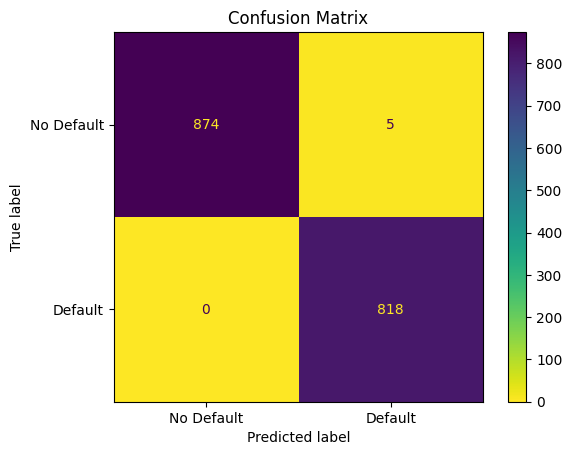

In [219]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, xgb_best.predict(x_test))

# Create and display confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Default', 'Default'])
disp.plot(cmap=plt.cm.viridis_r)

plt.title("Confusion Matrix")
plt.show()

In [220]:
xgb_best.feature_importances_

array([0.03797281, 0.01913022, 0.20036426, 0.0536711 , 0.0374695 ,
       0.05779304, 0.02813035, 0.06619627, 0.0414152 , 0.        ,
       0.00740258, 0.03597165, 0.00768346, 0.00199255, 0.01254835,
       0.01088292, 0.00296885, 0.        , 0.03873453, 0.0153467 ,
       0.        , 0.14260648, 0.        , 0.05201972, 0.        ,
       0.01914491, 0.        , 0.        , 0.        , 0.03378692,
       0.        , 0.04175038, 0.        , 0.0350172 ], dtype=float32)

In [223]:
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45)
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()


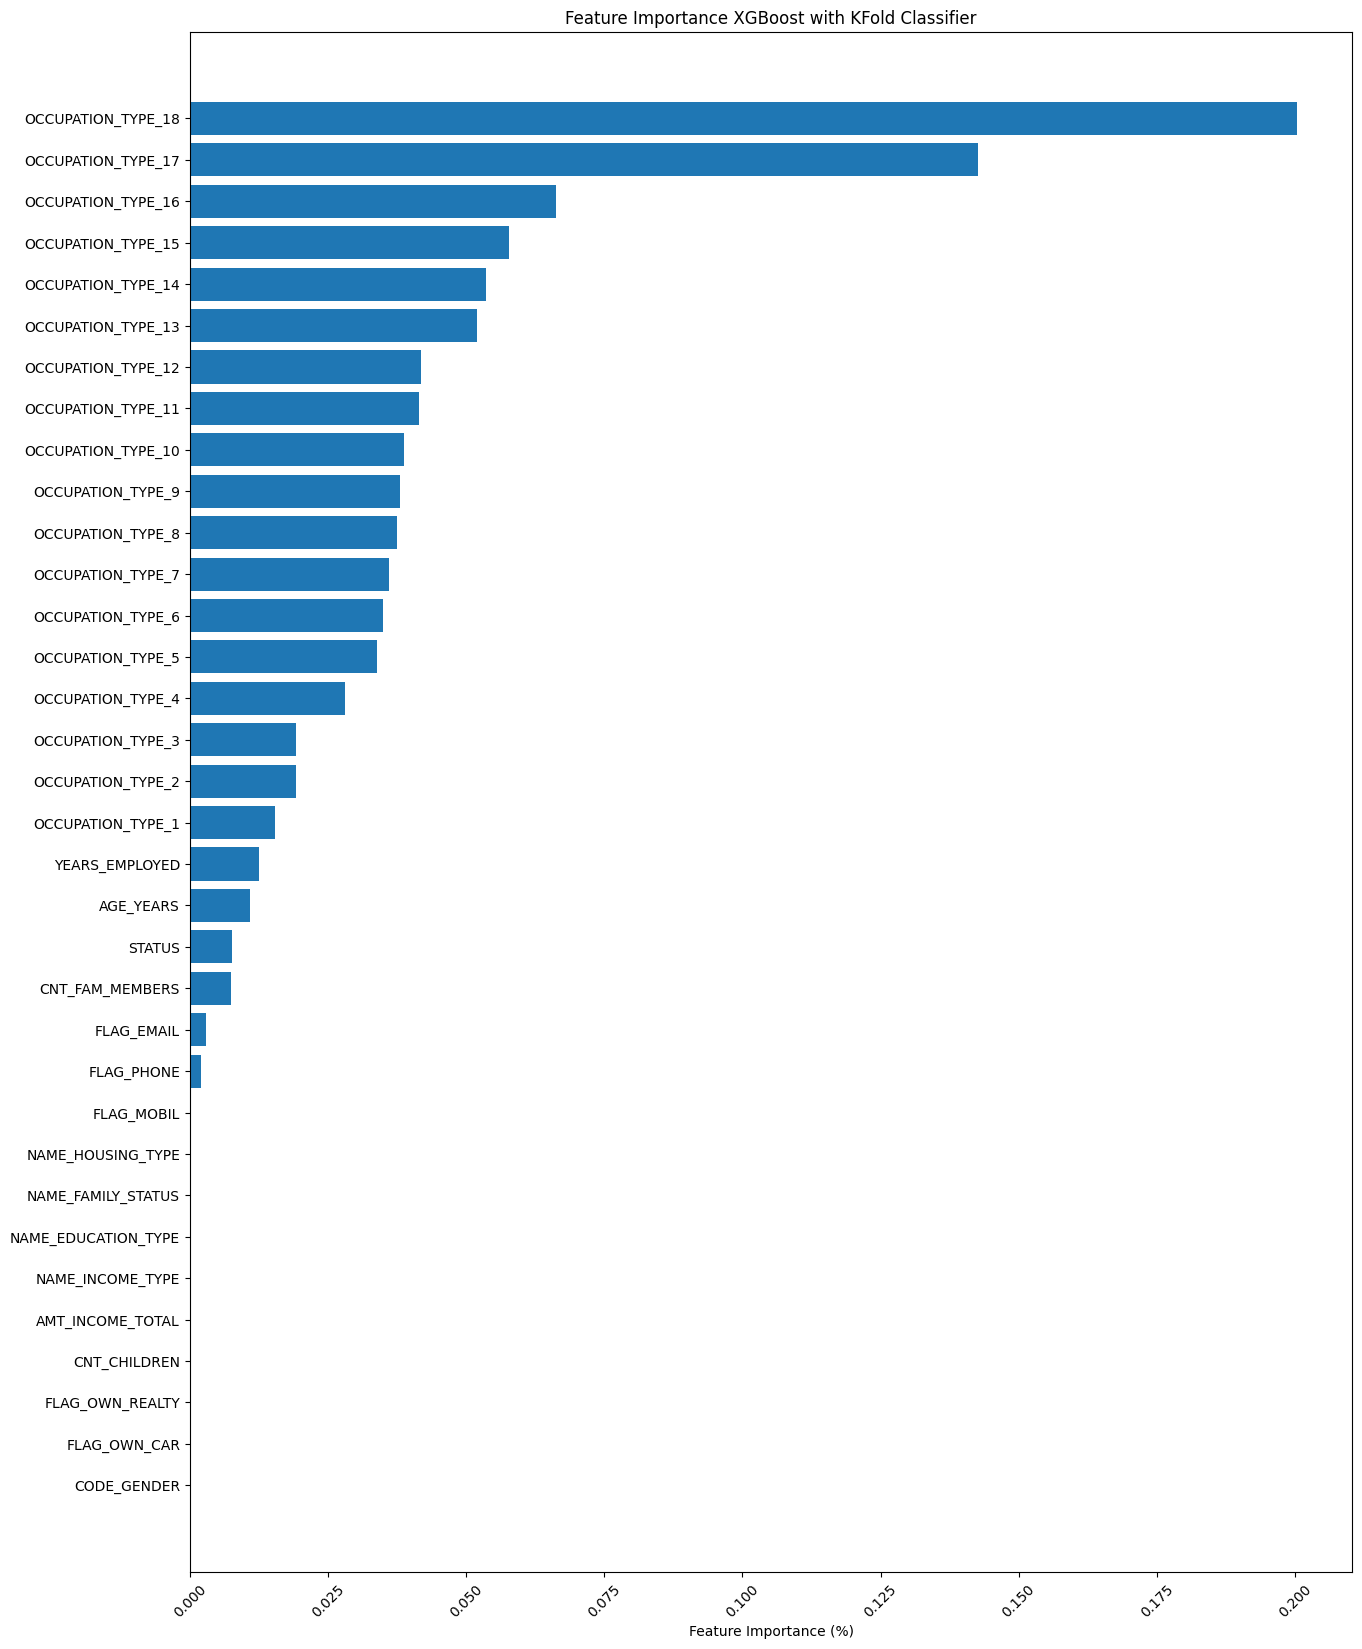

In [224]:
plot_feature_importance_2(x,xgb_best,' XGBoost with KFold Classifier')

Analysis: Measures how often a feature is used in a tree split

## Explainability

In [221]:
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(x_test)

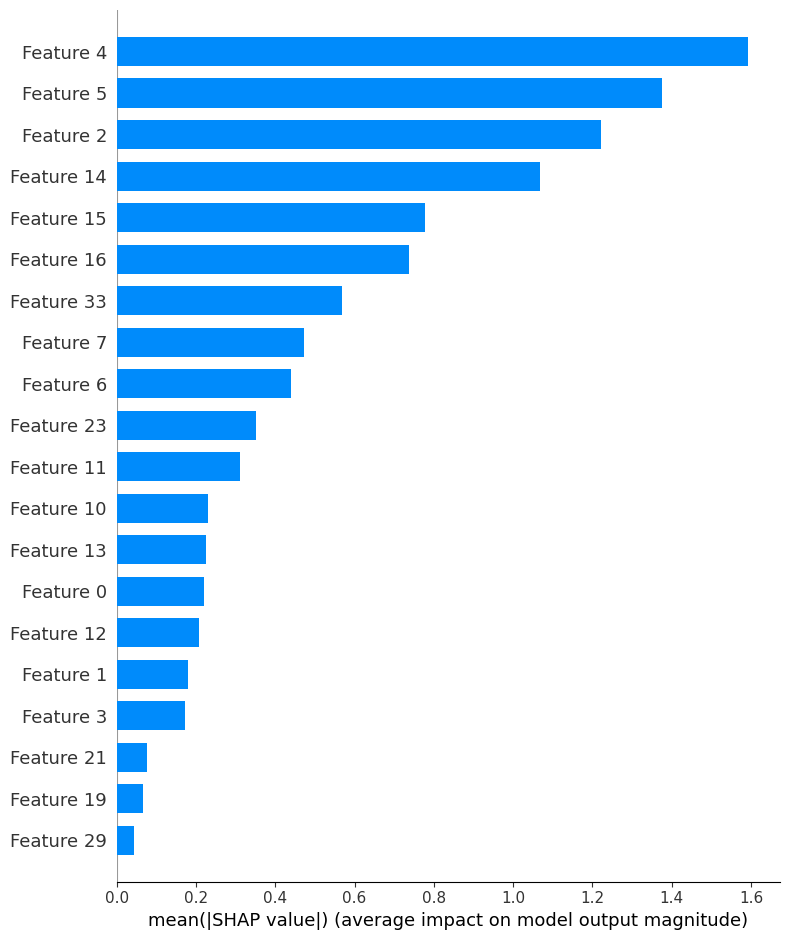

In [222]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, x_test, plot_type="bar")
plt.show()

Analysis: Measures the contribution of each feature to the model’s predictions